#### Exploratory Data Analysis (EDA) - on a Real Data Set using Numpy & Pandas in Python!
##### Dataset Used: *Superstore Dataset Analysis*
##### File Name: *superstore_dataset2011-2015.csv*

# Superstore Retail Analysis from 2011 to 2015

## About Dataset :

The Superstore dataset is relatively less used by the comunity due to lack of information about the columns,but thanks to the title of the dataset we know thare is related to purchases from many countries,cities,regions,different kind of products that are offered, the amount of sales, and profits that they got from 2011-2015 and many other columns that it gonna be analyzed further.

How this superstore has changed through time? Has the Superstore improve or got worse? Through many tools we are gonna analyze this data set and get some insights by using:

- Pandas
- Seaborn
- Matplotlib
- Numpy
- Calendar

## *Objective*

My objective is to do end to end EDA on this RETAIL SUPERSTORE data set to infer knowledge & outcomes, that can be used by the store to put more effort to improve the sales or building a machine learning model in the future.

## *Abstract*

When working on a new dataset in order to take intelligent action, we need to understand our data. Exploratory data analysis (EDA) allows us to develop the gist of what our data may look like and what kinds of questions can be answered by them. EDA is important because it allows the explorer to make critical decisions about what is interesting to pursue and what probably isn’t worth following up on and thus building a hypothesis using the relationships between variables. EDA helps us to gain insights and help us understand the correlation between the independent variables and target variables.

Based on the results of EDA, companies also make business decisions, which can have repercussions later.

*   If EDA is not done properly then it can hamper the further steps in the machine learning model building process.
*   If done well, it may improve the efficiancy of everything we do next.


## 1. Data Sourcing
Data Sourcing is the process of finding and loading the data into our system. Broadly there are two ways in which we can find data.

*   Private Data : Given and used by private organizations. There are some security and privacy concerns attached to it. This type of data is used for mainly organizations internal analysis.

*   Public Data : This type of Data is available to everyone. We can find this in government websites and public organizations etc.

> I will be using a Public Data Set for EDA which is uploaded on my local drive.

## 2. Data Importing, Preparation and Cleaning

Let's begin by firstly import tha pandas library as pd to download properly the dataset.


> Instructions:
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, duplicates incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [5]:
retail_df = pd.read_csv("C:/Users/gurve/Desktop/402 supply chain/archive (1)/superstore_dataset2011-2015.csv")

In [6]:
retail_df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High


In [7]:
retail_df.shape

(51290, 24)

The data set is conformed by 24 columns and 51290 rows. At ffirst view the dataset seems to be in perfect state and for an optimal use.

In [8]:
retail_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [9]:
retail_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [10]:
#droping / removing unnecessary columns which we don't need like "Row id, order id, cust id and other columns with ID" 

selected_columns = ['Order Date', 'Ship Date', 'Ship Mode',
        'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region',  'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority']
  

  

We need first of all to make a copy of the original dataset to make whatever we like without modify the original one

In [11]:
retail_df=retail_df[selected_columns].copy()

For better manipulation of the columns  in the future,its better to modify the name of some columns by adding "_"

In [12]:

retail_df.rename(columns={"Order Date":"Order_Date","Ship Date":"Ship_Date",
                        "Ship Mode":"Ship_Mode","Customer Name":"Customer_Name",
                         "Product Name":"Product_Name","Shipping Cost":"Shipping_Cost","Order Priority":"Order_Priority"},inplace=True)

                          

In [13]:
retail_df

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,Fairfield,California,United States,US,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Agadir,Souss-Massa-Dra�,Morocco,Africa,Africa,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Ju�rez,Chihuahua,Mexico,LATAM,North,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


Let's get the information about all the columns that we have in this data set and see on what type of variable they relies.

In [14]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Date      51290 non-null  object 
 1   Ship_Date       51290 non-null  object 
 2   Ship_Mode       51290 non-null  object 
 3   Customer_Name   51290 non-null  object 
 4   Segment         51290 non-null  object 
 5   City            51290 non-null  object 
 6   State           51290 non-null  object 
 7   Country         51290 non-null  object 
 8   Market          51290 non-null  object 
 9   Region          51290 non-null  object 
 10  Category        51290 non-null  object 
 11  Sub-Category    51290 non-null  object 
 12  Product_Name    51290 non-null  object 
 13  Sales           51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Discount        51290 non-null  float64
 16  Profit          51290 non-null  float64
 17  Shipping_Cost   51290 non-null 

We will  convert the variable type of Order_Date because in the data frame is seted as object. We will convert into date
and then split into Year, month and day for a better analysis. By the other hand we not have any non-null values  and all the other variables are in their correct type, so that is a great news!!

In [15]:
retail_df["Order_Date"]=pd.to_datetime(retail_df.Order_Date)

In [16]:
retail_df["Order_Date"]

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
51285   2014-12-31
51286   2014-12-31
51287   2014-12-31
51288   2014-12-31
51289   2014-12-31
Name: Order_Date, Length: 51290, dtype: datetime64[ns]

Now to to extract the datetime into other columns:

In [17]:
retail_df["year_order"]=pd.DatetimeIndex(retail_df.Order_Date).year
retail_df["month_order"]=pd.DatetimeIndex(retail_df.Order_Date).month
retail_df["day_order"]=pd.DatetimeIndex(retail_df.Order_Date).day


In [126]:
retail_df.dtypes

Order_Date        datetime64[ns]
Ship_Date                 object
Ship_Mode                 object
Customer_Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Category                  object
Sub-Category              object
Product_Name              object
Sales                    float64
Quantity                   int64
Profit                   float64
Shipping_Cost            float64
Order_Priority            object
year_order                 int64
month_order               object
day_order                  int64
Unit_Price               float64
dtype: object

In [127]:
retail_df['Ship_Date'] = pd.to_datetime(retail_df['Ship_Date']) 


In [128]:
retail_df['Ship_Mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [129]:
retail_df['Ship_Mode'] = retail_df['Ship_Mode'].astype('category')

In [130]:
retail_df['Segment']  = retail_df['Segment'].astype('category')
retail_df['Category'] =retail_df['Category'].astype('category')
retail_df['Order_Priority'] =retail_df['Order_Priority'].astype('category')
retail_df['month_order'] = retail_df['month_order'].astype('category')
retail_df['year_order'] = retail_df['year_order'].astype('category')
retail_df['Sub-Category'] = retail_df['Sub-Category'].astype('category')
retail_df['City'] = retail_df['City'].astype('category')
retail_df['State'] = retail_df['State'].astype('category')
retail_df['Country'] = retail_df['Country'].astype('category')
retail_df['Sub-Category'] = retail_df['Sub-Category'].astype('category')
retail_df['Region'] = retail_df['Region'].astype('category')
retail_df['Product_Name'] = retail_df['Product_Name'].astype('category')
retail_df['Market'] = retail_df['Market'].astype('category')

In [131]:
retail_df.dtypes

Order_Date        datetime64[ns]
Ship_Date         datetime64[ns]
Ship_Mode               category
Customer_Name             object
Segment                 category
City                    category
State                   category
Country                 category
Market                  category
Region                  category
Category                category
Sub-Category            category
Product_Name            category
Sales                    float64
Quantity                   int64
Profit                   float64
Shipping_Cost            float64
Order_Priority          category
year_order              category
month_order             category
day_order                  int64
Unit_Price               float64
dtype: object

Let's find some statistics about each one of the columns 

#### Aggregation for all numerical Columns / Values: 

We can see that in the column of profit,we get a min value of -6599.97800,so it is not possible no get any negative profits.
We'll procede to drop out any value < 0.

In [18]:
retail_df.drop(retail_df[retail_df.Profit < 0].index, inplace=True)

In the dataset we get the sales amount by the quantity of the products that the clients purchase.
It could be useful to have a column with the price per unit without the discount applied. Let's create it.

In [19]:
retail_df

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,City,State,Country,Market,Region,...,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,year_order,month_order,day_order
0,2011-01-01,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,2011,1,1
1,2011-01-01,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,2011,1,1
2,2011-01-01,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,...,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,2011,1,1
4,2011-01-01,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,2011,1,1
5,2011-01-01,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.3420,1.80,Medium,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,2014-12-31,4/1/2015,Standard Class,Julia Barnett,Home Office,Reynosa,Tamaulipas,Mexico,LATAM,North,...,"Novimex Legal Exhibit Labels, Adjustable",16.740,3,0.0,0.6600,1.32,Medium,2014,12,31
51285,2014-12-31,4/1/2015,Standard Class,Erica Bern,Corporate,Fairfield,California,United States,US,West,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,2014,12,31
51286,2014-12-31,5/1/2015,Standard Class,Liz Preis,Consumer,Agadir,Souss-Massa-Dra�,Morocco,Africa,Africa,...,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,2014,12,31
51287,2014-12-31,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,...,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,2014,12,31


In [20]:
retail_df["Unit_Price"]=(retail_df["Sales"]/(1-retail_df["Discount"]))/retail_df["Quantity"]

In [21]:
retail_df["Unit_Price"]

0        204.15
1         44.58
2         16.53
4         25.26
5         30.69
          ...  
51284      5.58
51285      8.69
51286      3.99
51287      8.80
51288      7.12
Name: Unit_Price, Length: 38746, dtype: float64

Let's change the format of the column "month_order" by converting the number of month into the month name for better analysis and visualization in the further analysis.

In [22]:
import calendar


In [23]:
retail_df['month_order'] = retail_df['month_order'].apply(lambda x: calendar.month_abbr[x])

In [24]:
retail_df.describe()

,Sales,Quantity,Discount,Profit,Shipping_Cost,year_order,day_order,Unit_Price
count,38746.000000,38746.000000,38746.000000,38746.000000,38746.000000,38746.000000,38746.000000,38746.000000
mean,262.026642,3.492438,0.043224,61.634838,28.040322,2012.777913,16.200176,80.724029
std,505.527561,2.278813,0.087444,156.682637,60.064071,1.097704,8.313560,127.319782
min,0.990000,1.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,0.990000
25%,34.240000,2.000000,0.000000,6.179400,2.930000,2012.000000,9.000000,13.440000
50%,93.024000,3.000000,0.000000,17.910000,8.420000,2013.000000,16.000000,32.320000
75%,264.928800,5.000000,0.002000,54.994500,25.960000,2014.000000,23.000000,94.720000
max,17499.950000,14.000000,0.500000,8399.976000,933.570000,2014.000000,31.000000,3499.990000


By seeing the statistics of the dataframe and focusing specially in Sales and profit We can means of 262.02 and 61.63 
respectively. but with maximum values that are very much large. Due this we can explain too the large std in those columns.
But we can see to that exists products with a value of 3499 which is max unit price detailed i the Unit_Price. Let's see a deep 
analysis further.It seems that the profit and 

# Missing values

In [25]:
# Checking the missing values
retail_df.isnull().sum()

Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Category          0
Sub-Category      0
Product_Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping_Cost     0
Order_Priority    0
year_order        0
month_order       0
day_order         0
Unit_Price        0
dtype: int64

>As we can see none of the columns contain missing values. So there is nothing to handle. If there were missing values then we would've handled them by dropping the missing records or imputing the values.

# Unique and duplicate values across all columns:

In [26]:
# Finding duplicates
retail_df.duplicated().sum()

0

In [27]:
#Printing Unique Segment
retail_df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [28]:
#Unique Values across all columns 
retail_df.columns.values

array(['Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Category',
       'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority', 'year_order',
       'month_order', 'day_order', 'Unit_Price'], dtype=object)

In [29]:
# Creating a column name
columns_name=['No of Unique Values in each feature']

In [30]:
# Assign unique values from all the variables to the above column
pd.DataFrame(retail_df.nunique(),columns=columns_name)

,No of Unique Values in each feature
Order_Date,1419
Ship_Date,1463
Ship_Mode,4
Customer_Name,795
Segment,3
City,3258
State,926
Country,136
Market,7
Region,13


In [31]:
#Importing the dataset
df = pd.read_csv("C:/Users/gurve/Desktop/402 supply chain/archive (1)/superstore_dataset2011-2015.csv")

In [32]:
#printing the first two rows
retail_df.head(2)

,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,City,State,Country,Market,Region,...,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,year_order,month_order,day_order,Unit_Price
0,2011-01-01,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,...,408.300,2,0.0,106.140,35.46,Medium,2011,Jan,1,204.15
1,2011-01-01,8/1/2011,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,...,120.366,3,0.1,36.036,9.72,Medium,2011,Jan,1,44.58


In [33]:
#printintg all the column values
retail_df.columns.values

array(['Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Category',
       'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority', 'year_order',
       'month_order', 'day_order', 'Unit_Price'], dtype=object)

In [34]:
#Storing all the columns in "column_names" variable for changing the postion of columns in the next step.

column_names=['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Postal Code', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority','Sales']

In [35]:
df.head(2) 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


***As we observe above, there few columns like ID's which logicaly dont have impact on the Sales,so we can just drop such***

In [36]:
#droping / removing unnecessary columns which we don't need like "Row id, order id, cust id and other columns with ID" 

df.drop(['Row ID','Order ID','Customer ID','Product ID','Postal Code','Ship Mode'],axis=1,inplace=True)
df.head()

,Order Date,Ship Date,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,1/1/2011,6/1/2011,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,1/1/2011,8/1/2011,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,1/1/2011,5/1/2011,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,1/1/2011,5/1/2011,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,1/1/2011,8/1/2011,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [37]:
# Priniting the shape of data
df.shape 

(51290, 18)

Due to huge amount of data(52000 rows) was not supported by the system, so I'll be proceeding with 10000 rows of data and dropping the rest.

# Duplicate values across all columns

In [38]:
#creating df1 variable for reading and storing the data
df1 = pd.read_csv("C:/Users/gurve/Desktop/402 supply chain/archive (1)/superstore_dataset2011-2015.csv")

In [39]:
# Finding duplicates
df1.duplicated().sum()

0

As we observe above there are no duplicates in our data sets

It returns a Boolean Series with True value for each duplicated row

We can Observe we have ZERO duplicate rows in the data

# Drop all non-essential features before model building and testing:


In [40]:
df.Region.unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Central Asia', 'West',
       'North Asia', 'Central', 'South', 'Canada', 'Southeast Asia',
       'East', 'Caribbean'], dtype=object)

In [41]:
df2=pd.get_dummies(df[['Region','Sales']],drop_first=True)
df2.head(2)

,Sales,Region_Canada,Region_Caribbean,Region_Central,Region_Central Asia,Region_EMEA,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West
0,408.300,0,0,0,0,0,0,0,0,0,0,0,0
1,120.366,0,0,0,0,0,0,0,0,1,0,0,0


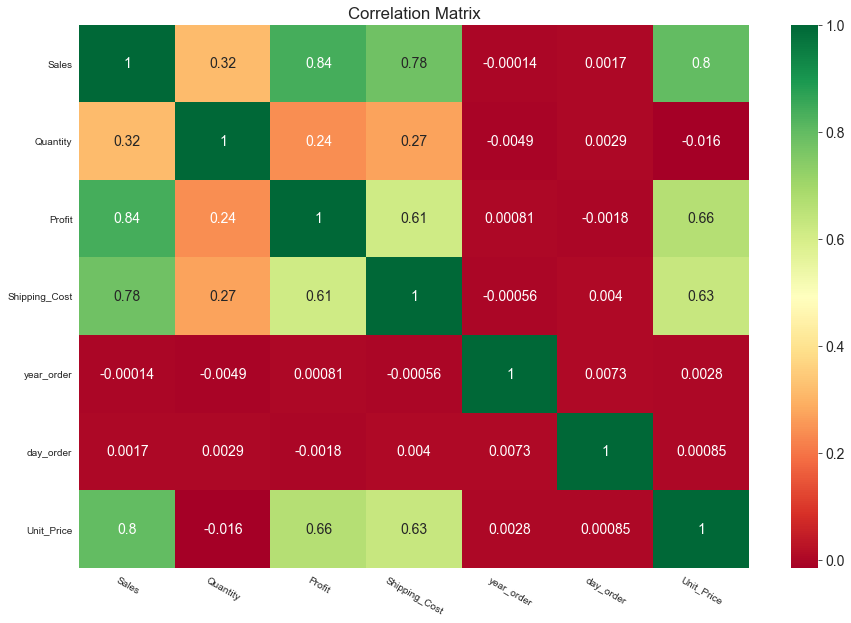

In [125]:
#plotting heatmap of numerical columns

corr_data = retail_df[numerical]
corr = corr_data.corr(method='pearson')
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:>

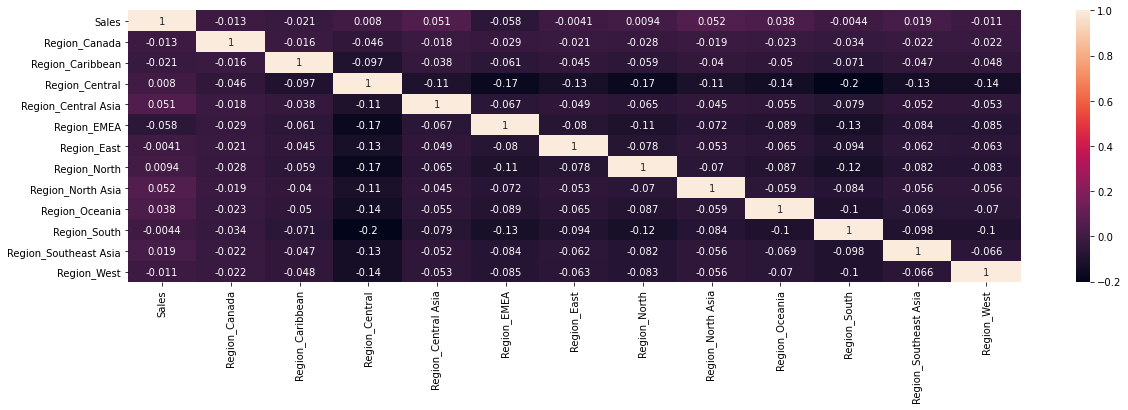

In [42]:
plt.figure(figsize=(20,5))
sns.heatmap(df2.corr(),annot=True)

In [43]:
df3=pd.get_dummies(df[['Market','Sales']],drop_first=True)
df3.head(2)

,Sales,Market_Africa,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US
0,408.300,1,0,0,0,0,0
1,120.366,0,0,0,0,0,0


In [44]:
df3=pd.get_dummies(df[['Category','Sales']],drop_first=True)
df3.head(2)

,Sales,Category_Office Supplies,Category_Technology
0,408.300,1,0
1,120.366,1,0


<AxesSubplot:>

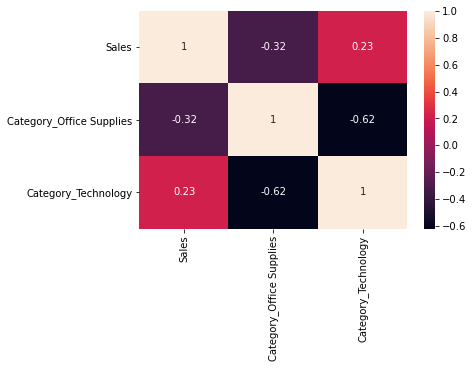

In [45]:
sns.heatmap(df3.corr(),annot=True)

According to obvservation above ,we can update data as follows

 1.MARKET,REGION and CATEGORY,SUB-CATEGORY are negatively correlated as well as has no coorelation with SALES ,which logically says that  MARKET,REGION constitues for CITY,COUNTRY,STATES and also Category,Sub_Category constitutes for Product Name which we can take them down.

 2.We can drop Customer Name,Product ID,Customer ID,Row ID as they no impact on Sales

In [46]:
#Dropping variables with no impact on sales.

df.drop(['Customer Name','City','State','Country','Market','Region','Product Name'],axis=1,inplace=True)

In [47]:
df.drop(['Order Date','Ship Date'],axis=1,inplace=True)
df.head(2)


,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Consumer,Office Supplies,Storage,408.300,2,0.0,106.140,35.46,Medium
1,Consumer,Office Supplies,Supplies,120.366,3,0.1,36.036,9.72,Medium


# 7. Handling Outliers:
Replacing outliers with Nulls (if you find it essential) and replace all the nulls with respective approach of central tendencies (Mean/Median/Mode).


Calculate Z score to validate whether outliers are still present or not¶

In [48]:
# Calculate Z score to find outliers.

df.isnull().sum()

Segment           0
Category          0
Sub-Category      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

<AxesSubplot:xlabel='Quantity'>

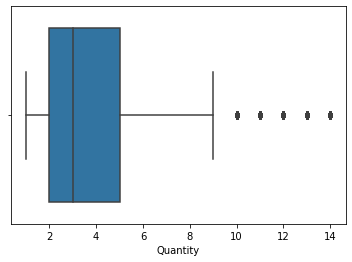

In [49]:
sns.boxplot('Quantity',data=retail_df)

# In Quantity,we cannot remove outliers,depending on discount,product will be sold more,hence we will be having some products 

different from usual



<AxesSubplot:xlabel='Discount'>

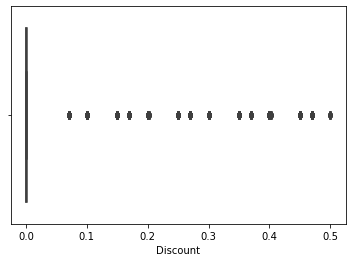

In [50]:
sns.boxplot('Discount',data=retail_df)

(array([2.962e+04, 4.609e+03, 5.972e+03, 7.550e+02, 3.477e+03, 2.685e+03,
        2.200e+01, 2.046e+03, 1.786e+03, 3.180e+02]),
 array([0.   , 0.085, 0.17 , 0.255, 0.34 , 0.425, 0.51 , 0.595, 0.68 ,
        0.765, 0.85 ]),
 <BarContainer object of 10 artists>)

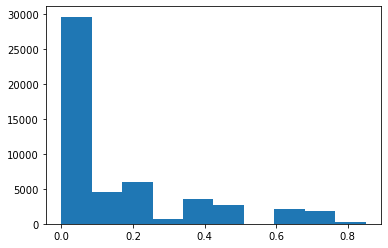

In [51]:
plt.hist(x='Discount',data=df,bins=10)

Here also if we observe,we have some unusual discounts crossing 50% ,sometimes stores put discount more to sell off RTC products

<AxesSubplot:xlabel='Profit'>

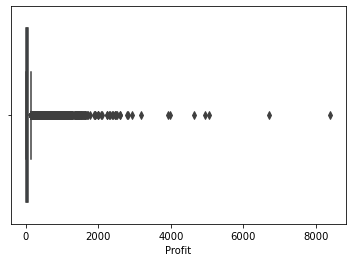

In [52]:
sns.boxplot('Profit',data=retail_df)

# removing outlier

In [53]:
#Removing Outliers with the Interquartile Range Method (IQR)

Q1 = retail_df.quantile(0.25) #first 25% 
Q3 = retail_df.quantile(0.75) #first 75% 
IQR = Q3 - Q1 

scale = 2 #For Normal Distributions, scale = 1.5
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR

lower_outliers = (retail_df[retail_df.columns[2:13]] < lower_lim)
upper_outliers = (retail_df[retail_df.columns[2:13]] > upper_lim)

In [54]:
import seaborn as sns

<AxesSubplot:xlabel='Profit'>

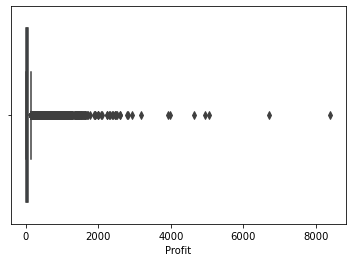

In [55]:
sns.boxplot('Profit',data=retail_df)

(array([1.0000e+00, 3.0000e+00, 9.0000e+00, 1.9400e+02, 5.0888e+04,
        1.7700e+02, 1.1000e+01, 5.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-6599.978 , -5099.9826, -3599.9872, -2099.9918,  -599.9964,
          899.999 ,  2399.9944,  3899.9898,  5399.9852,  6899.9806,
         8399.976 ]),
 <BarContainer object of 10 artists>)

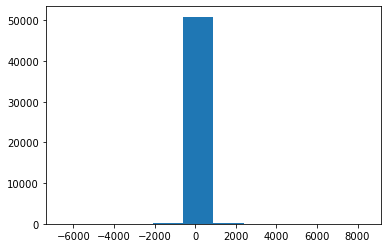

In [56]:
plt.hist(x='Profit',data=df,bins=10)

In [57]:
df[df.Profit>3000]

,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
8898,Corporate,Technology,Copiers,17499.950,5,0.0,8399.9760,349.07,Medium
17421,Corporate,Office Supplies,Appliances,7958.580,14,0.0,3979.0800,778.32,Low
25346,Consumer,Office Supplies,Binders,6354.950,5,0.0,3177.4750,581.12,Medium
29946,Consumer,Technology,Copiers,10499.970,3,0.0,5039.9856,363.19,Medium
30124,Consumer,Office Supplies,Binders,9892.740,13,0.0,4946.3700,498.70,Medium
37929,Consumer,Office Supplies,Binders,9449.950,5,0.0,4630.4755,655.61,Medium
38234,Home Office,Technology,Copiers,11199.968,4,0.2,3919.9888,45.98,High
38848,Consumer,Technology,Copiers,13999.960,4,0.0,6719.9808,20.00,Medium


As we can see,we have an outlier after 4000,which is excess,so we will drop it

In [58]:
# Dropping outliers 
df.drop(6719,inplace=True)

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

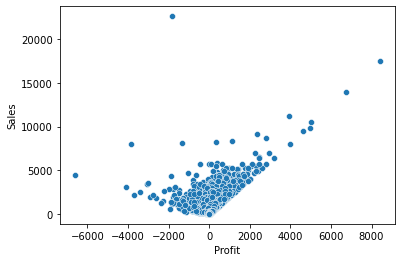

In [59]:
sns.scatterplot(x='Profit',y='Sales',data=df)

On the negative side also we have bit outiers,we will replace them with Lower limit(1.5 X IQR),and basicallly on the negative profit means its the loss incurred due to more amount of discount on the products.

In [60]:
Q1=df['Profit'].quantile(q=0.25)
Q3=df['Profit'].quantile(q=0.75)
print('25th percentile and 75 percentile are:',Q1,Q3)
IQR=Q3-Q1
print('Inter quartile range=',IQR)
upper_limit=Q3+(1.5*IQR)
lower_limit=Q1-(1.5*IQR)
print('Upper limit is :',upper_limit)
print('Lower limit is :',lower_limit)      

25th percentile and 75 percentile are: 0.0 36.81
Inter quartile range= 36.81
Upper limit is : 92.025
Lower limit is : -55.215


<AxesSubplot:xlabel='Profit', ylabel='Sales'>

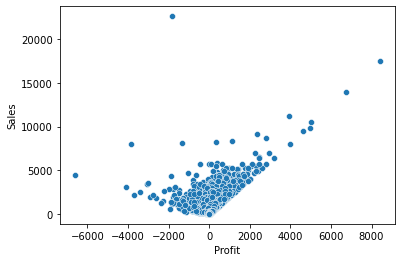

In [61]:
sns.scatterplot(x='Profit',y='Sales',data=df)

(array([4.8023e+04, 2.1070e+03, 6.1500e+02, 2.7600e+02, 1.1100e+02,
        7.1000e+01, 4.0000e+01, 2.3000e+01, 1.2000e+01, 1.1000e+01]),
 array([  0.   ,  93.357, 186.714, 280.071, 373.428, 466.785, 560.142,
        653.499, 746.856, 840.213, 933.57 ]),
 <BarContainer object of 10 artists>)

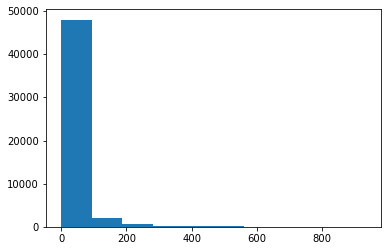

In [62]:
plt.hist(x='Shipping Cost',data=df,bins=10)

<AxesSubplot:xlabel='Shipping Cost', ylabel='Sales'>

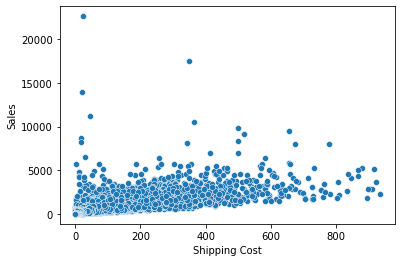

In [63]:
sns.scatterplot(x='Shipping Cost',y='Sales',data=df)

In [64]:
df[df['Shipping Cost']>300 ].head(5)

,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
305,Consumer,Furniture,Chairs,2807.84,8,0.0,673.8816,487.15,High
415,Corporate,Furniture,Chairs,2754.00,6,0.0,358.0200,752.47,Critical
700,Corporate,Technology,Machines,1619.10,10,0.0,258.9000,301.73,High
775,Consumer,Furniture,Tables,855.15,1,0.0,384.8100,325.04,Critical
912,Corporate,Office Supplies,Appliances,2526.93,5,0.1,561.4800,689.80,Critical


> As we can observe ,above shipping cost are HIGH usually for critical and also for Corporate segments,which are essential so we are not treating them

In [65]:
df.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51289.00000,51289.000000,51289.000000,51289.000000,51289.000000
mean,246.47236,3.476515,0.142907,28.608833,26.373159
std,487.55265,2.278779,0.212282,174.341992,57.293962
min,0.44400,1.000000,0.000000,-6599.978000,0.000000
25%,30.75600,2.000000,0.000000,0.000000,2.610000
50%,85.05000,3.000000,0.000000,9.240000,7.790000
75%,251.01000,5.000000,0.200000,36.810000,24.450000
max,22638.48000,14.000000,0.850000,8399.976000,933.570000


In [66]:
df.head()

,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Consumer,Office Supplies,Storage,408.300,2,0.0,106.140,35.46,Medium
1,Consumer,Office Supplies,Supplies,120.366,3,0.1,36.036,9.72,Medium
2,Consumer,Office Supplies,Storage,66.120,4,0.0,29.640,8.17,High
3,Home Office,Office Supplies,Paper,44.865,3,0.5,-26.055,4.82,High
4,Consumer,Furniture,Furnishings,113.670,5,0.1,37.770,4.70,Medium


In [67]:
df[df.Sales>8000]

,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
2255,Consumer,Technology,Machines,8159.952,8,0.4,-1359.9920,342.11,Medium
8209,Consumer,Technology,Machines,8749.950,5,0.0,2799.9840,17.83,Critical
8898,Corporate,Technology,Copiers,17499.950,5,0.0,8399.9760,349.07,Medium
27043,Corporate,Technology,Machines,9099.930,7,0.0,2365.9818,516.91,Medium
28612,Home Office,Technology,Machines,22638.480,6,0.5,-1811.0784,24.29,Medium
29946,Consumer,Technology,Copiers,10499.970,3,0.0,5039.9856,363.19,Medium
30124,Consumer,Office Supplies,Binders,9892.740,13,0.0,4946.3700,498.70,Medium
37929,Consumer,Office Supplies,Binders,9449.950,5,0.0,4630.4755,655.61,Medium
38234,Home Office,Technology,Copiers,11199.968,4,0.2,3919.9888,45.98,High
38848,Consumer,Technology,Copiers,13999.960,4,0.0,6719.9808,20.00,Medium


As we can observe above,we have sales more than 8000 as those are machines being sold at that prices, we will not consider them outliers

## 3 . Exploratory Analysis and Visualization (Graphs & Charts Plotting)

**TO DO** -



> Instructions:
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`libraries which will help in plotting graphs and visual charts.

In [68]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 3.(a) Plotting Important Graphs & Charts first for the Target variable (Sales).

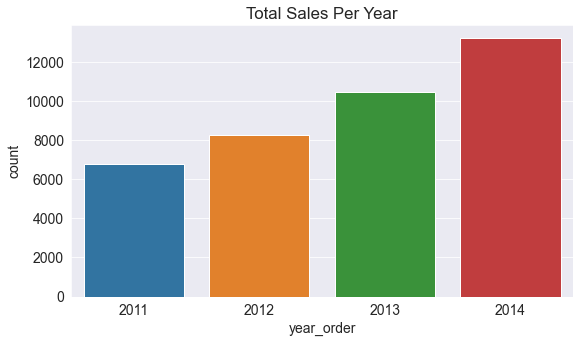

In [69]:
#Plotting Countplot to find - total no of Sales per year

sns.countplot('year_order', data = retail_df)
plt.title('Total Sales Per Year')
plt.show()

In this case , it seems that this retail store has increase their orders by having around 7000 orders in 2011 to above of 12000 orders
in 2014. By consequence it seems that their sales are increased too.

Let's see by visualizing a plot of the top regions that purchase in this store.

In [70]:
#Regions with top purchase
top_regions=retail_df.Region.value_counts()
top_regions

Central           8335
South             4957
North             3874
Africa            3557
EMEA              3423
West              2885
Oceania           2428
East              2295
North Asia        2117
Central Asia      1775
Southeast Asia    1461
Caribbean         1255
Canada             384
Name: Region, dtype: int64

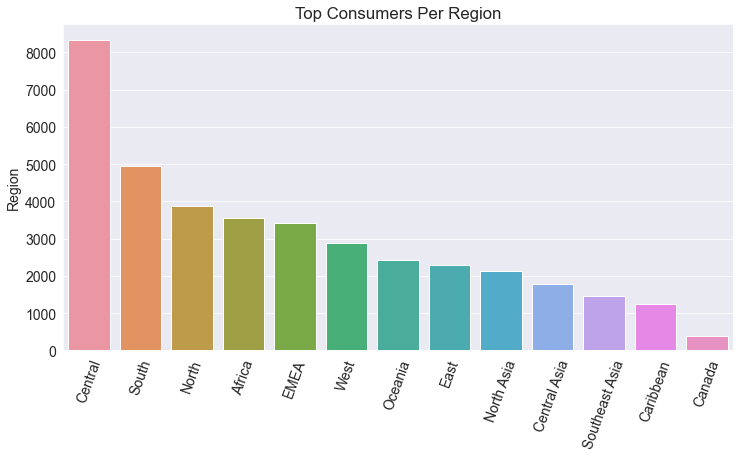

In [71]:
# Barplot of region with top purchase or top consumer per region

plt.figure(figsize=(12,6))
plt.xticks(rotation=70)
plt.title("Top Consumers Per Region")
sns.barplot(x=top_regions.index, y=top_regions);

By doing the plot above, it seems that their best consumers are located in Central, South and North America. in the 1st,2nd and 3rd
place respectively.

<function matplotlib.pyplot.show(close=None, block=None)>

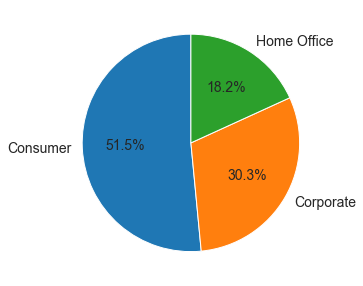

In [72]:
 # showing segment wise data with % . 
import pandas as pd
import matplotlib.pyplot as plt
pie_df = (df.groupby('Segment')['Sales'].sum()).to_frame()
pie_df['Percent_Sale'] = round((pie_df.Sales/sum(pie_df.Sales))*100)   
plt.pie(pie_df.Percent_Sale, labels=pie_df.index,  startangle=90, autopct='%.1f%%');plt.show   #format strimg

<AxesSubplot:ylabel='Category'>

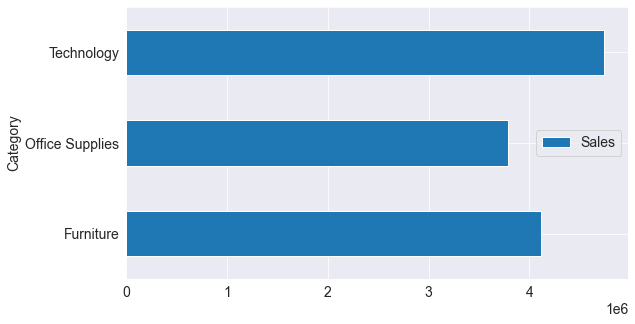

In [73]:
#showing category ang region wise sales using stack bar #
stacked_df = pd.pivot_table(df,index=['Category'], values=['Sales'], aggfunc='sum')
stacked_df.plot.barh(stacked=True)

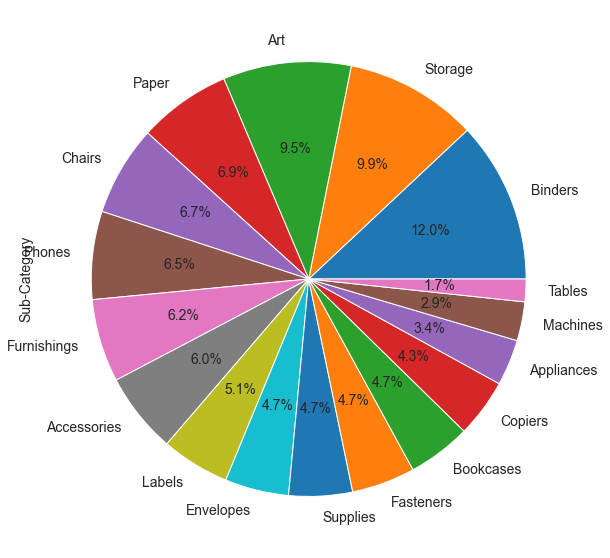

In [74]:
#from this chart we can easily make out which category & sub category to choose when they looking to purchase a product. #  
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [75]:
#Count of Segment with top Purchase
segment=retail_df.Segment.value_counts()
segment

Consumer       19997
Corporate      11658
Home Office     7091
Name: Segment, dtype: int64

In [76]:
#Count of Category with top Purchase
category=retail_df.Category.value_counts()
category 

Office Supplies    24270
Technology          7717
Furniture           6759
Name: Category, dtype: int64

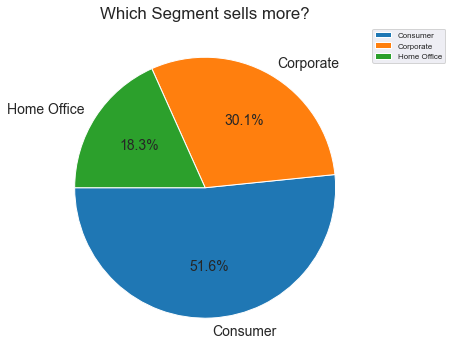

In [77]:
#Pie chart of segment with top purchase
plt.figure(figsize=(12,6))
plt.title("Which Segment sells more?")
plt.pie(segment, labels=segment.index, autopct='%1.1f%%', startangle=180);
plt.legend(loc = 2,fontsize  = 8, bbox_to_anchor = (1, 1), ncol = 1);



As we can see in the pie chart above ,the segment  "Consumer" is the biggest in his business.

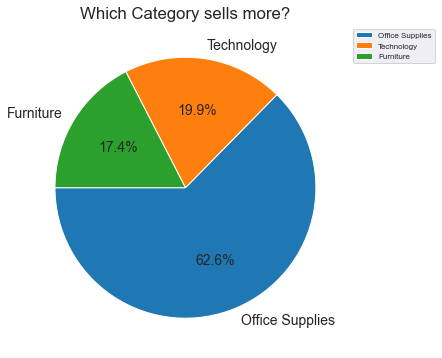

In [78]:
#Pie chart of category with top purchase
plt.figure(figsize=(12,6))
plt.title("Which Category sells more?")
plt.pie(category, labels=category.index, autopct='%1.1f%%', startangle=180);
plt.legend(loc = 2,fontsize  = 8, bbox_to_anchor = (1, 1), ncol = 1);


By viewing the pie chart of "Which Category sells more" we can say that "Office Supplies" leads by far with 62:6 % comparing it with Technology and Furniture.

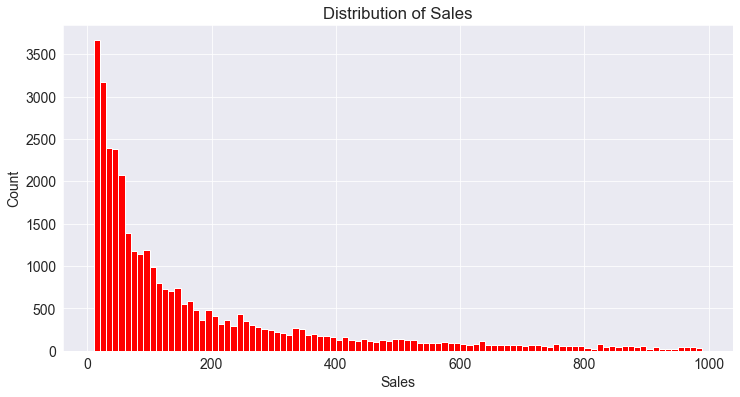

In [79]:
#Plotting distribution of sales with histogram

import numpy as np
plt.figure(figsize=(12, 6))
plt.title("Distribution of Sales")
plt.xlabel('Sales')
plt.ylabel('Count')

plt.hist(retail_df.Sales, bins=np.arange(10,1000,10), color='Red');

> As we can see the sales of Superstore are mostly in a range of 0 to 1000 dollars.We tried to put the range until the maximum value that was 17499.95 but since it seems that sales above 1000 are very rare ,the visualization will not gonna show clearly.  It seems that the sales of the Superstore behaves
as an Exponential Distribution.

In [80]:
# Year wise sales
sales_df=retail_df[["Sales","year_order"]]
sales_df

,Sales,year_order
0,408.300,2011
1,120.366,2011
2,66.120,2011
4,113.670,2011
5,55.242,2011
...,...,...
51284,16.740,2014
51285,13.904,2014
51286,3.990,2014
51287,26.400,2014


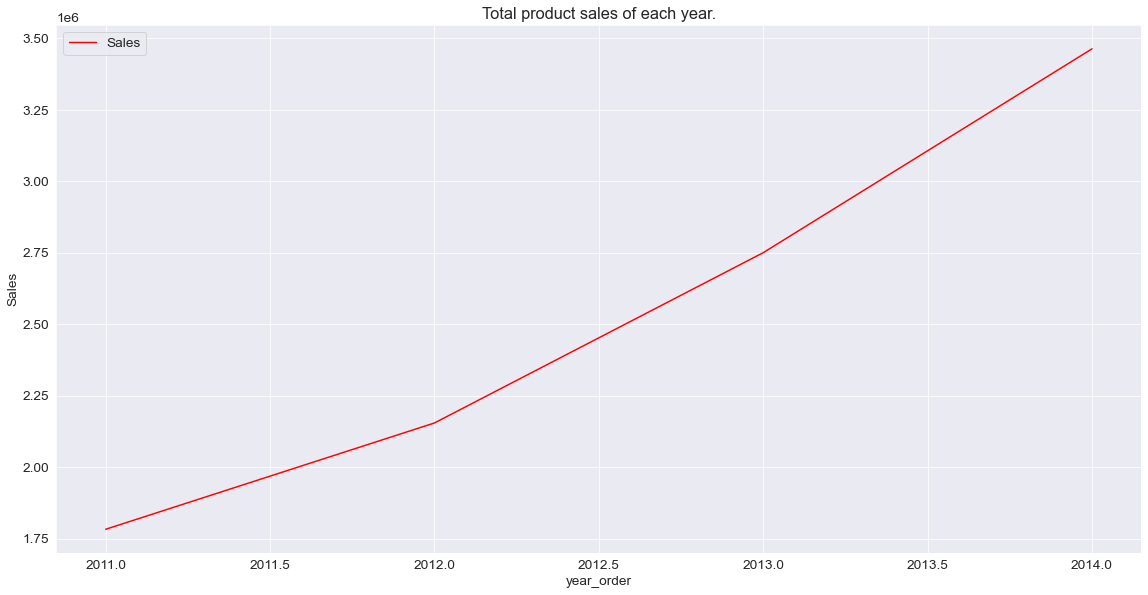

In [81]:
#Line plot to find - Product sales of each year.

sales = sales_df.groupby('year_order', as_index = False ).sum()

x_axis = sales['year_order']
y_axis = sales['Sales']

plt.figure(figsize=(20,10), dpi= 70)
plt.plot(x_axis, y_axis, label = 'Sales', color = "Red")
plt.xlabel('year_order')
plt.ylabel('Sales')
plt.title('Total product sales of each year.')
plt.legend()
plt.show()

In the lineplot above it seems more clearly that Superstore has increased their sales  from 1.75 millions of dollars to 3.50 millions of dollars
So that is that,they have tripled their Sales in 3 years.

### 3.(b) Now we'll Plot other different kinds of charts like : Boxplot, barplot, countplot, histrogram, correlation heatmap. etc.

#### Histogram – Distribution of Target Variable (Sales)

(array([3.791e+04, 7.140e+02, 9.100e+01, 2.000e+01, 4.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([9.9000000e-01, 1.7508860e+03, 3.5007820e+03, 5.2506780e+03,
        7.0005740e+03, 8.7504700e+03, 1.0500366e+04, 1.2250262e+04,
        1.4000158e+04, 1.5750054e+04, 1.7499950e+04]),
 <BarContainer object of 10 artists>)

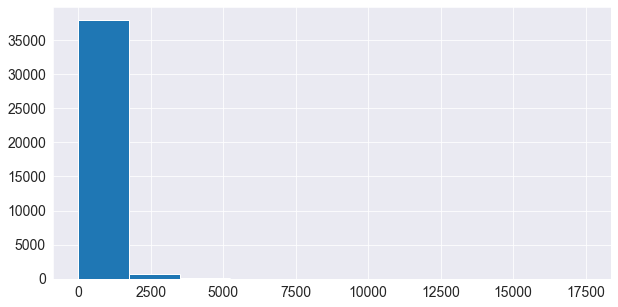

In [82]:
#plotting the histogram

plt.figure(figsize=(10,5))
plt.hist(x='Sales',data=retail_df,bins=10)

#### Distribution Plot – Target Variable (Sales)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

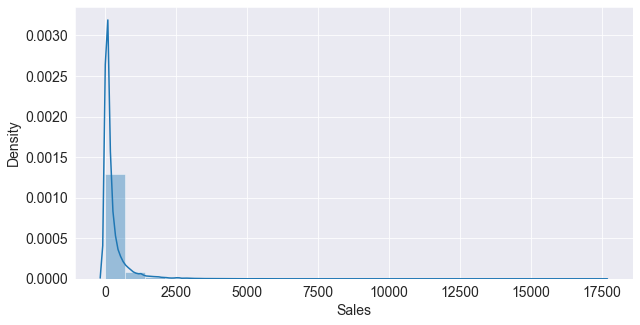

In [83]:
plt.figure(figsize=(10,5))
sns.distplot(retail_df['Sales'],bins=25)

In [84]:
variance = retail_df.var()
variance

Sales            255558.115032
Quantity              5.192987
Discount              0.007646
Profit            24549.448799
Shipping_Cost      3607.692591
year_order            1.204954
day_order            69.115278
Unit_Price        16210.326767
dtype: float64

In [85]:
retail_df = retail_df.drop(['Discount'],axis = 1) # drop Discount because it has variance close to 0 it means it provide less information.

#### Correlation – Heatmap:

In [86]:
retail_df.columns.values

array(['Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Category',
       'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Profit',
       'Shipping_Cost', 'Order_Priority', 'year_order', 'month_order',
       'day_order', 'Unit_Price'], dtype=object)

In [87]:
#Categorial columns
categorical = ['Customer Name', 'Segment', 'City','State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category',
               'Product Name','Order Priority']

In [88]:
# numerical columns
numerical = [x for x in retail_df.columns.to_list() if x not in categorical]
numerical

['Order_Date',
 'Ship_Date',
 'Ship_Mode',
 'Customer_Name',
 'Product_Name',
 'Sales',
 'Quantity',
 'Profit',
 'Shipping_Cost',
 'Order_Priority',
 'year_order',
 'month_order',
 'day_order',
 'Unit_Price']

Observation: As we can observe above, we can state following points

-Shipping cost and Sales are Maximum correlated(0.78)
-Profit and Sales are correlated(0.84)
-Discount and Sales has value closer to 0,so almost there is no correlation between them
-Apparently,Profit and Discount are negatively coorelated.

#### Bar Plot:

**With Categorical against numerical Features**

Text(0.5, 1.0, 'Market Wise Sales')

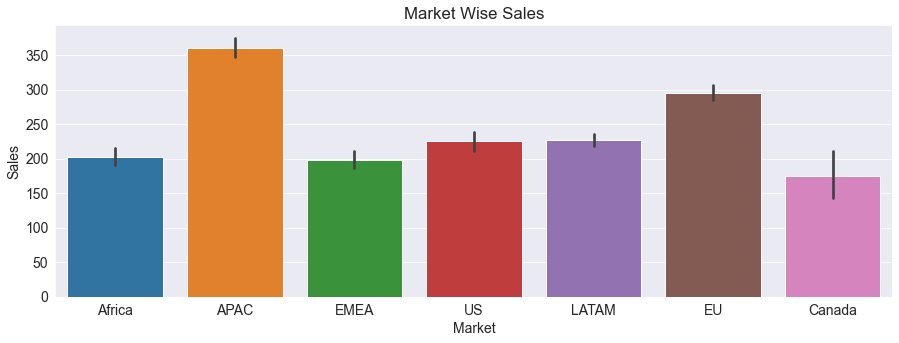

In [90]:
# Market wise sales Barplot
plt.figure(figsize=(15,5))
sns.barplot(x='Market',y='Sales', data=retail_df)
plt.title('Market Wise Sales')

Text(0.5, 1.0, 'Region Wise Sales')

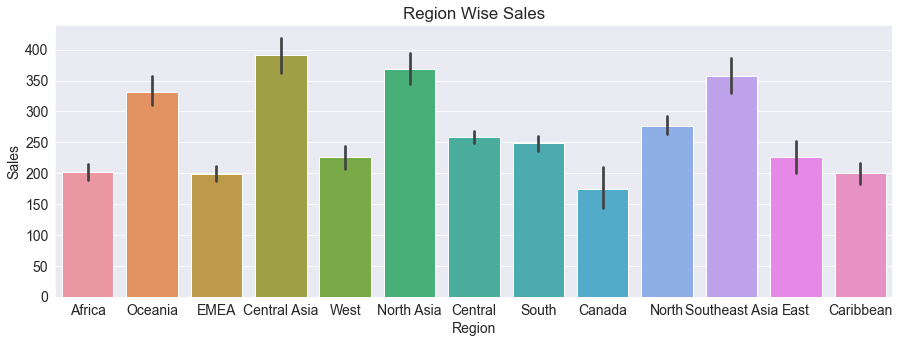

In [91]:
#Region wise sales barplot
plt.figure(figsize=(15,5))
sns.barplot(x='Region',y='Sales', data=retail_df)
plt.title('Region Wise Sales')

Text(0.5, 1.0, 'Category Wise Sales')

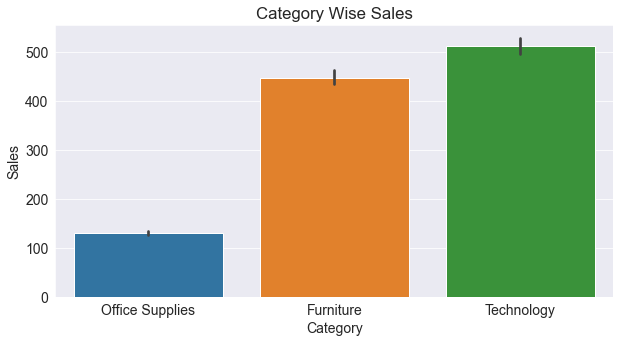

In [92]:
plt.figure(figsize=(10,5))
sns.barplot(x='Category',y='Sales', data=retail_df)
plt.title('Category Wise Sales')

Text(0.5, 1.0, 'Market Wise Sales')

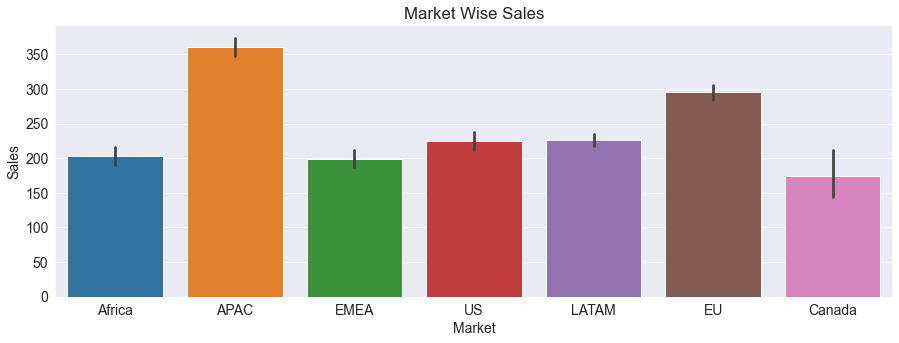

In [93]:
# Market wise sales Barplot
plt.figure(figsize=(15,5))
sns.barplot(x='Market',y='Sales', data=retail_df)
plt.title('Market Wise Sales')

> We can see, Market wise Asia-Pacific (APAC) region has the highest sales record.

> We can see, Region wise North Asia and then Central Asia region have the highest sales record.

Text(0.5, 1.0, 'Category Wise Sales')

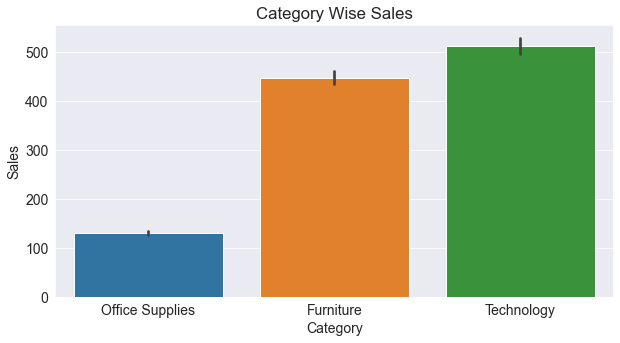

In [94]:
plt.figure(figsize=(10,5))
sns.barplot(x='Category',y='Sales', data=retail_df)
plt.title('Category Wise Sales')

> As per the dataset barplot, technology is leading category in sales.

Text(0.5, 1.0, 'Sub Category Wise Sales')

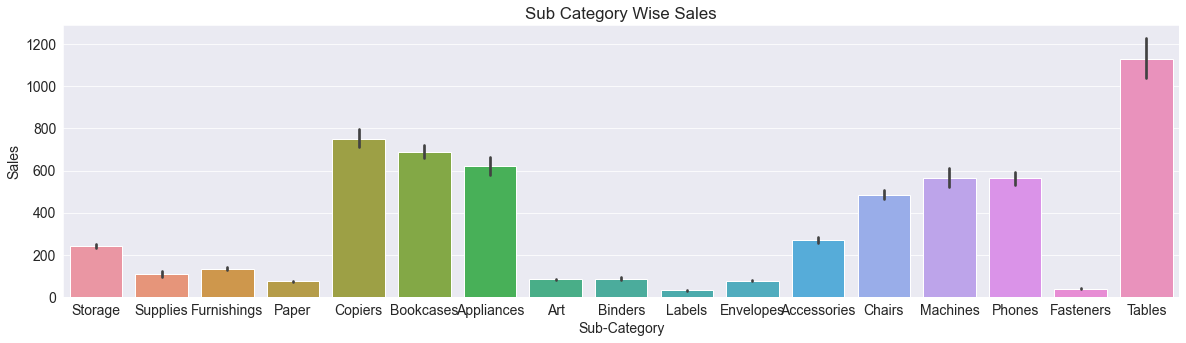

In [95]:
plt.figure(figsize=(20,5))
sns.barplot(x='Sub-Category',y='Sales', data=retail_df)
plt.title('Sub Category Wise Sales')

> Sub category wise: Tables,Copiers, Bookcases, appliances, phones, machines and chairs have high sales record.

# 8. Building a model of choice – Regression problem statement, hence building a regression model first and calculating MAE, MSE, RMSE, MPE and MAPE. Also see the R2 score
In this,first we will build model on 'df' variable then 'EXEP' variable ,which ever model gives more performance will use that model for further models

In [132]:
from sklearn.model_selection import train_test_split

In [135]:
df=pd.get_dummies(df,drop_first=True)
df.head(2)

,Sales,Quantity,Discount,Profit,Shipping Cost,Segment_Corporate,Segment_Home Office,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,408.300,2,0.0,106.140,35.46,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,120.366,3,0.1,36.036,9.72,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [136]:
X = df.drop('Sales',axis=1)

In [137]:
X.head()

,Quantity,Discount,Profit,Shipping Cost,Segment_Corporate,Segment_Home Office,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,2,0.0,106.140,35.46,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,3,0.1,36.036,9.72,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,4,0.0,29.640,8.17,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,3,0.5,-26.055,4.82,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,5,0.1,37.770,4.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [138]:
y = df['Sales']
y

0        408.300
1        120.366
2         66.120
3         44.865
4        113.670
          ...   
51285     13.904
51286      3.990
51287     26.400
51288      7.120
51289      3.024
Name: Sales, Length: 51289, dtype: float64

# MinMax

In [139]:

from sklearn.preprocessing import MinMaxScaler


In [140]:
scaler=MinMaxScaler()
scaler_retail_df=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
scaler_retail_df

,Quantity,Discount,Profit,Shipping Cost,Segment_Corporate,Segment_Home Office,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,0.076923,0.000000,0.447076,0.037983,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.153846,0.117647,0.442402,0.010412,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.230769,0.000000,0.441976,0.008751,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.153846,0.588235,0.438263,0.005163,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.307692,0.117647,0.442518,0.005034,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,0.076923,0.235294,0.440301,0.000953,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51285,0.000000,0.000000,0.440028,0.000525,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51286,0.153846,0.000000,0.440824,0.000375,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51287,0.000000,0.000000,0.440037,0.000214,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [141]:
from sklearn.model_selection import train_test_split

In [142]:
train_input,test_input,train_output,test_output =train_test_split(scaler_retail_df, y,test_size=0.30, random_state=3)

In [143]:
print(train_input.shape)
print(test_input.shape)
print(train_output.shape)
print(test_output.shape)

(35902, 27)
(15387, 27)
(35902,)
(15387,)


In [144]:
train_input.value_counts()

Quantity  Discount  Profit    Shipping Cost  Segment_Corporate  Segment_Home Office  Category_Office Supplies  Category_Technology  Sub-Category_Appliances  Sub-Category_Art  Sub-Category_Binders  Sub-Category_Bookcases  Sub-Category_Chairs  Sub-Category_Copiers  Sub-Category_Envelopes  Sub-Category_Fasteners  Sub-Category_Furnishings  Sub-Category_Labels  Sub-Category_Machines  Sub-Category_Paper  Sub-Category_Phones  Sub-Category_Storage  Sub-Category_Supplies  Sub-Category_Tables  Order Priority_High  Order Priority_Low  Order Priority_Medium
0.153846  0.705882  0.438505  0.001339       0.0                1.0                  0.0                       0.0                  0.0                      0.0               0.0                   0.0                     0.0                  0.0                   0.0                     0.0                     1.0                       0.0                  0.0                    0.0                 0.0                  0.0                   0.0

In [173]:
from imblearn.over_sampling import SMOTE

In [174]:
SMOTE = SMOTE(random_state=4)

In [176]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [177]:
train_input_SMOTE,train_output_SMOTE = SMOTE.fit_resample(train_input,train_output)


ValueError: Unknown label type: 'continuous'

# Training the Linear Regression model on the Training set

In [149]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_input, train_output)

LinearRegression()

# Predicting the Test set results

In [150]:
y_pred = regressor.predict(train_input)
np.set_printoptions(precision=2)
y_pred

array([243.73,  87.73, 169.  , ...,  38.63, 700.64,  38.85])

In [151]:
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(train_output,y_pred)
mse

77072.33058309338

In [152]:
mae = sklearn.metrics.mean_absolute_error(train_output,y_pred) # mean absolute error#
mae

111.95962931180715

In [153]:
import math
rmse= math.sqrt(mse)
rmse

277.61903858181876

In [154]:
  def mean_absolute_percentage_error(y_true, y_predict): 
    y_true, y_predict = np.array(y_true), np.array(y_predict)
    return np.mean(np.abs((y_true - y_predict) / y_true)) * 100

In [160]:
mean_absolute_percentage_error(train_output, y_pred)

177.12777955154337

In [157]:
from sklearn.metrics import r2_score
r2_score(train_output, y_pred)

0.6792152725609297